In [12]:
!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_excel('credit card.xlsx')

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [15]:
df.shape

(30000, 25)

In [16]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [17]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


In [20]:

df = df.rename(columns={'default.payment.next.month':'payment'})

In [21]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
x = df.drop(['ID','payment'],axis=1)

In [23]:
y = df['payment']

In [24]:
y.value_counts()

,count
payment,
0,23364
1,6636


**Extra Tree Classifier**

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
extr = ExtraTreesClassifier()

In [27]:
extr.fit(x,y)

ExtraTreesClassifier()

In [28]:
extr.feature_importances_

array([0.06561865, 0.01162325, 0.0333245 , 0.02171449, 0.06647484,
       0.09262204, 0.05057948, 0.03786596, 0.03030813, 0.03059933,
       0.02647183, 0.05045806, 0.04640965, 0.04490649, 0.04478917,
       0.04395663, 0.04410829, 0.04427317, 0.04230049, 0.04143176,
       0.04123572, 0.04261308, 0.046315  ])

In [29]:
feature_importance = extr.feature_importances_

In [30]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])

In [31]:
imp.head()

,Gain_Score
0,0.065619
1,0.011623
2,0.033324
3,0.021714
4,0.066475


In [32]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [33]:
cols = pd.DataFrame(x.columns, columns=['Feature Name'])

In [34]:
cols.head()

,Feature Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [35]:
gains = pd.concat([cols,imp],axis=1)

In [36]:
gains.head()

,Feature Name,Gain_Score
0,LIMIT_BAL,0.065619
1,SEX,0.011623
2,EDUCATION,0.033324
3,MARRIAGE,0.021714
4,AGE,0.066475


In [37]:

gains.nlargest(15,'Gain_Score')

,Feature Name,Gain_Score
5,PAY_0,0.092622
4,AGE,0.066475
0,LIMIT_BAL,0.065619
6,PAY_2,0.050579
11,BILL_AMT1,0.050458
12,BILL_AMT2,0.046410
22,PAY_AMT6,0.046315
13,BILL_AMT3,0.044906
14,BILL_AMT4,0.044789
17,PAY_AMT1,0.044273


<Axes: >

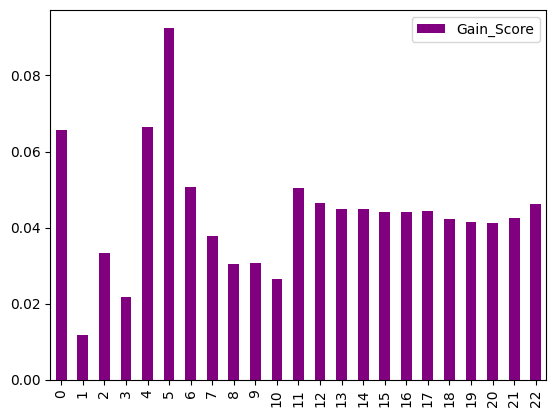

In [41]:
from matplotlib import pyplot as plt
gains.plot(kind='bar',color='purple')

<Axes: >

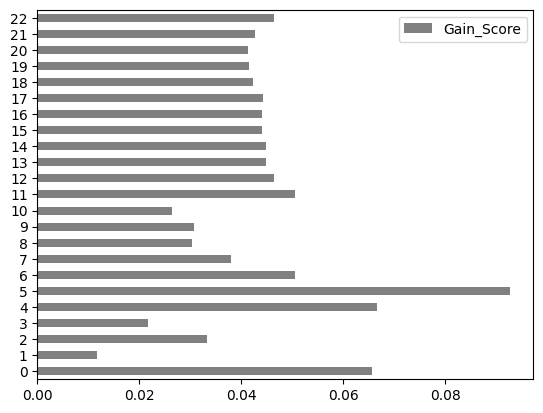

In [43]:
gains.plot(kind='barh',color='gray')

<Figure size 1000x600 with 0 Axes>

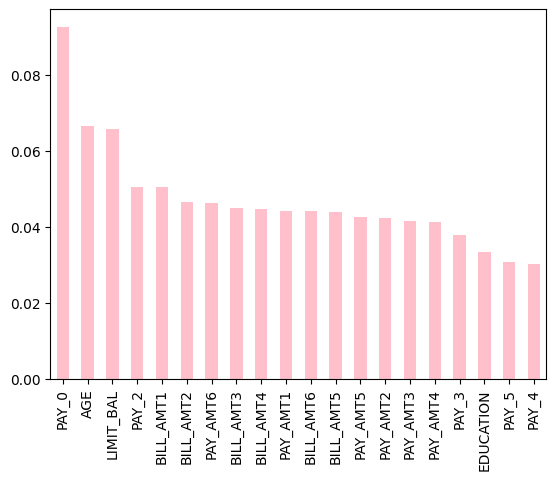

<Figure size 1000x600 with 0 Axes>

In [46]:
features = pd.Series(extr.feature_importances_, index=x.columns)
features.nlargest(20).plot(kind='bar',color='pink')
plt.figure(figsize=(10,6))

**Select K Best**

In [47]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month':'payment'})
x = df.drop(['ID','payment'],axis=1)
y = df['payment']

In [48]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

In [50]:
model2 = SelectKBest(score_func=f_classif)

In [51]:
feature_score = model2.fit(x,y)

In [52]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [53]:
cols = pd.DataFrame(feature_score.scores_, columns=['Feature Score'])

In [54]:
cols

,Feature Score
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [55]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [56]:
col2 = pd.DataFrame(x.columns, columns=['Feature Names'])

In [57]:
col2.head()

,Feature Names
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [58]:
scores = pd.concat([col2,cols],axis=1)

In [59]:
scores

,Feature Names,Feature Score
0,LIMIT_BAL,724.068539
1,SEX,47.978854
2,EDUCATION,23.547112
3,MARRIAGE,17.781271
4,AGE,5.788556
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


In [60]:
newx = scores.nlargest(15,'Feature Score')

In [61]:
newx.head()

,Feature Names,Feature Score
5,PAY_0,3537.714970
6,PAY_2,2239.169136
7,PAY_3,1757.466444
8,PAY_4,1476.845967
9,PAY_5,1304.591176


**PCA**

In [62]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month':'payment'})
x = df.drop(['ID','payment'],axis=1)
y = df['payment']

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mmx = MinMaxScaler()

In [65]:
scaled_x = mmx.fit_transform(x)

In [66]:
scaled_x.shape

(30000, 23)

In [67]:
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)

In [70]:
x_pca

array([[ 0.40423245, -0.00800476,  0.00259672],
       [ 0.39188881,  0.209224  ,  0.19698759],
       [ 0.39264215,  0.08409527,  0.12656657],
       ...,
       [-0.62351265,  0.33728837,  0.08489178],
       [-0.60374479, -0.01953155, -0.214211  ],
       [-0.60917214,  0.0099741 , -0.23321988]])